In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
print(os.listdir("../data"))

['mal_url_dataset.csv', 'urldata.csv']


In [3]:
urldata = pd.read_csv("../data/mal_url_dataset.csv")

In [4]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,1,http://abc.go.com/shows/the-muppets/video/new-...,benign,0
2,2,http://allegro.pl/sporty-towarzyskie-i-rekreac...,benign,0
3,3,http://askubuntu.com/questions/605806/why-dead...,benign,0
4,4,http://elitedaily.com/news/world/man-wife-preg...,benign,0


In [5]:
#removing unnamed column
urldata = urldata.drop('Unnamed: 0',axis=1)

In [6]:
urldata

,url,label,result
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,http://abc.go.com/shows/the-muppets/video/new-...,benign,0
2,http://allegro.pl/sporty-towarzyskie-i-rekreac...,benign,0
3,http://askubuntu.com/questions/605806/why-dead...,benign,0
4,http://elitedaily.com/news/world/man-wife-preg...,benign,0
...,...,...,...
49995,http://www.xpj5988.com/skin/css/cn.css;jsessio...,malicious,1
49996,http://www.xpj5988.com/skin/css/cn.css;jsessio...,malicious,1
49997,http://www.xpj5988.com/skin/css/cn.css;jsessio...,malicious,1
49998,http://www.xpj5988.com/skin/css/cn.css;jsessio...,malicious,1


In [7]:
urldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     50000 non-null  object
 1   label   50000 non-null  object
 2   result  50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
#checking for missing values
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [9]:
from urllib.parse import urlparse

In [10]:
from tld import get_tld

In [11]:
#length of url
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [12]:
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [13]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [14]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))


In [15]:
urldata.head()

,url,label,result,url_length,hostname_length,tld,tld_length,count@,count.,count-http
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,83,8,to,2,0,1,1
1,http://abc.go.com/shows/the-muppets/video/new-...,benign,0,83,10,com,3,0,2,1
2,http://allegro.pl/sporty-towarzyskie-i-rekreac...,benign,0,83,10,pl,2,0,1,1
3,http://askubuntu.com/questions/605806/why-dead...,benign,0,83,13,com,3,0,1,1
4,http://elitedaily.com/news/world/man-wife-preg...,benign,0,83,14,com,3,0,1,1


Text(0, 0.5, 'Number Of URLs')

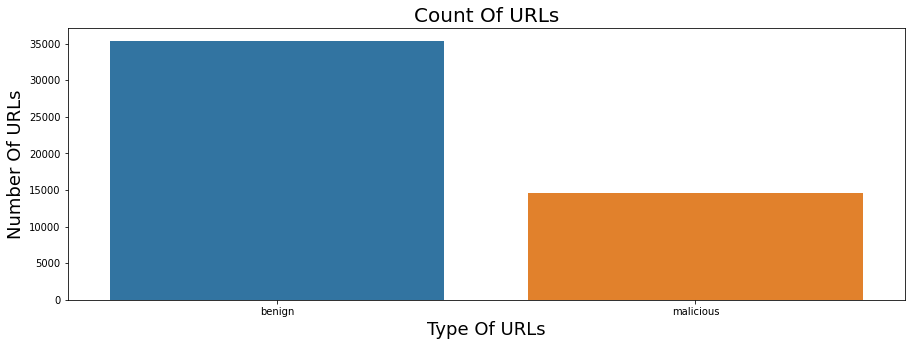

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [17]:
print(f"Percent Of Malicious URLs:{round(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100, 2)} %")
print(f"Percent Of Benign URLs:{round(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100, 2)} %")

Percent Of Malicious URLs:29.24 %
Percent Of Benign URLs:70.76 %


(30.0, 250.0)

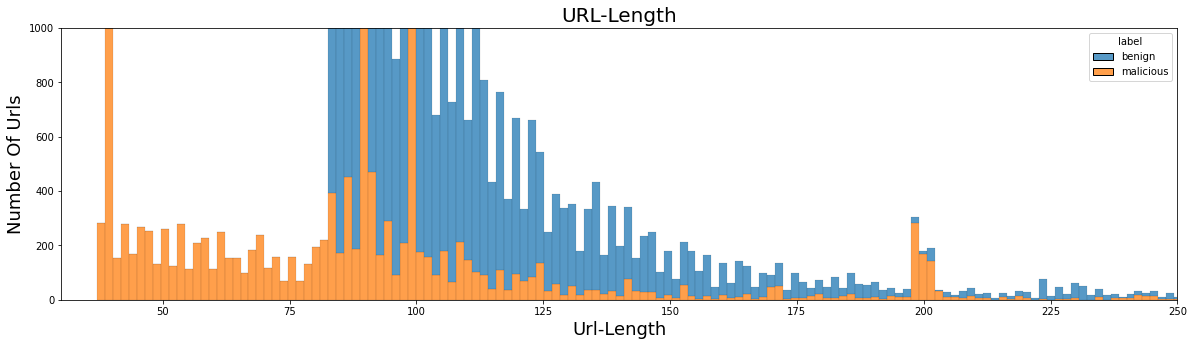

In [18]:
plt.figure(figsize=(20,5))
sns.histplot(data= urldata, x='url_length', hue='label', multiple='stack')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)
plt.xlim(30,250)

(0.0, 80.0)

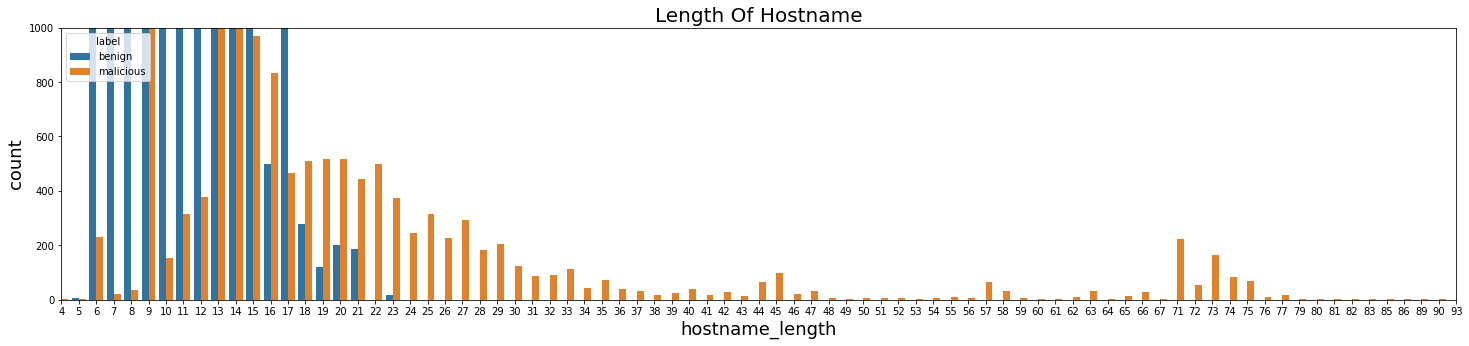

In [19]:
plt.figure(figsize=(25,5))
plt.title("Length Of Hostname",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
sns.countplot(x='hostname_length',data=urldata,hue='label')
plt.ylim(0,1000)
plt.xlim(0,80)

(0.0, 40.0)

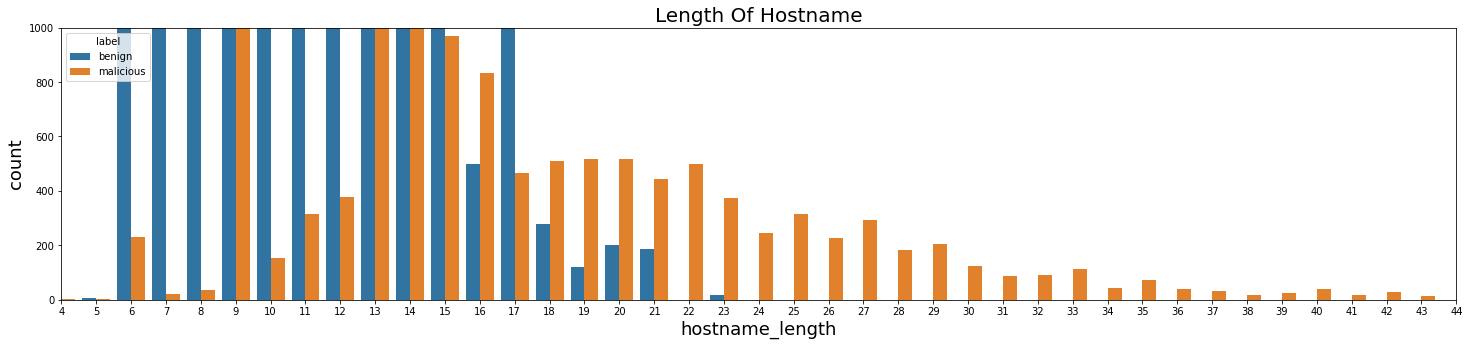

In [20]:
plt.figure(figsize=(25,5))
plt.title("Length Of Hostname",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
sns.countplot(x='hostname_length',data=urldata,hue='label')
plt.ylim(0,1000)
plt.xlim(0,40)

(0.0, 12000.0)

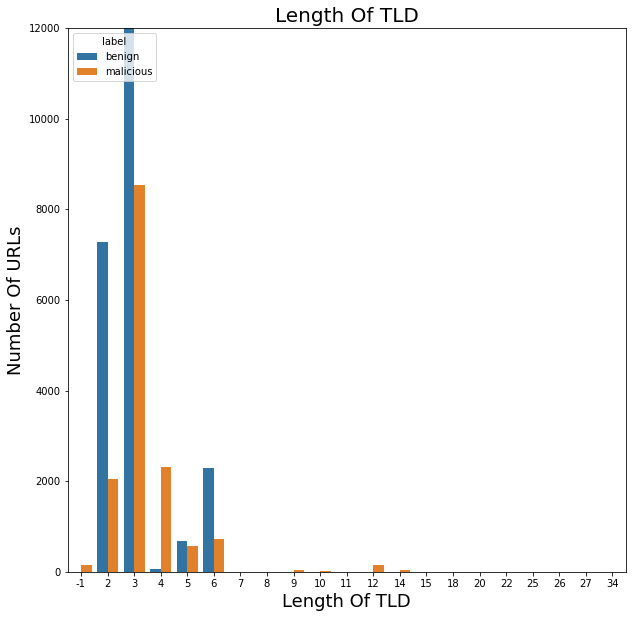

In [21]:
plt.figure(figsize=(10,10))
plt.title("Length Of TLD",fontsize=20)
sns.countplot(x='tld_length',data=urldata,hue='label')
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,12000)

(0.0, 20000.0)

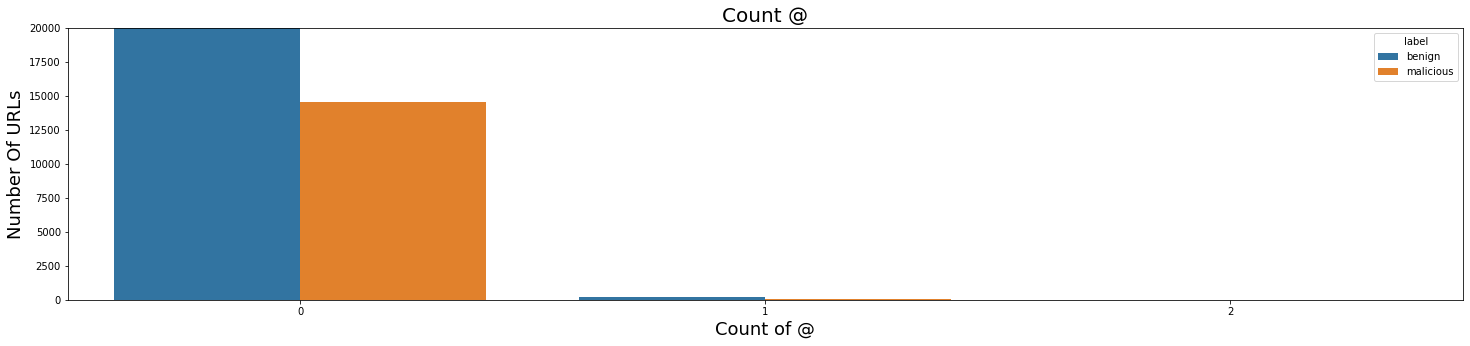

In [22]:
plt.figure(figsize=(25,5))
plt.title("Count @",fontsize=20)
sns.countplot(x='count@',data=urldata,hue='label')
plt.xlabel("Count of @",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,20000)

(0.0, 12.0)

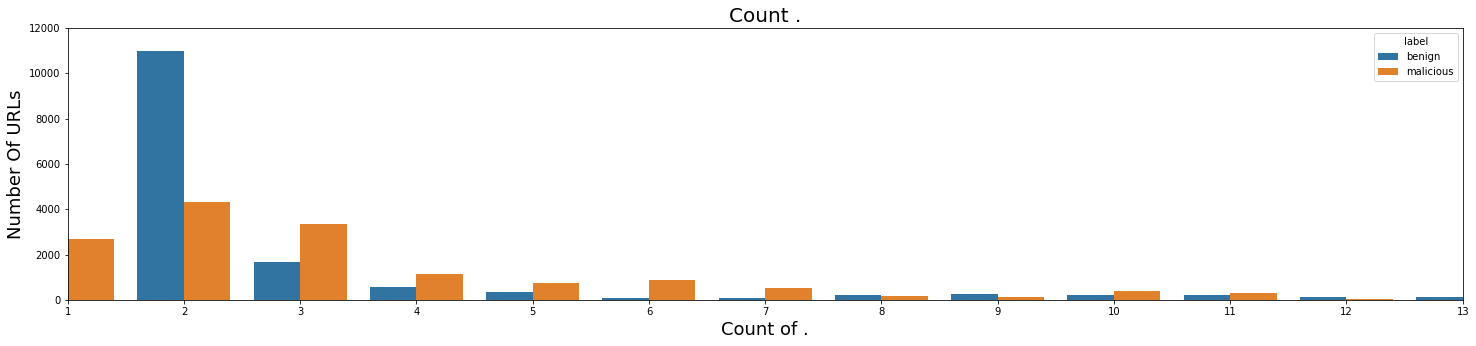

In [23]:
plt.figure(figsize=(25,5))
plt.title("Count .",fontsize=20)
sns.countplot(x='count.',data=urldata,hue='label')
plt.xlabel("Count of .",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.ylim(0,12000)
plt.xlim(0,12)

Text(0, 0.5, 'Number Of URLs')

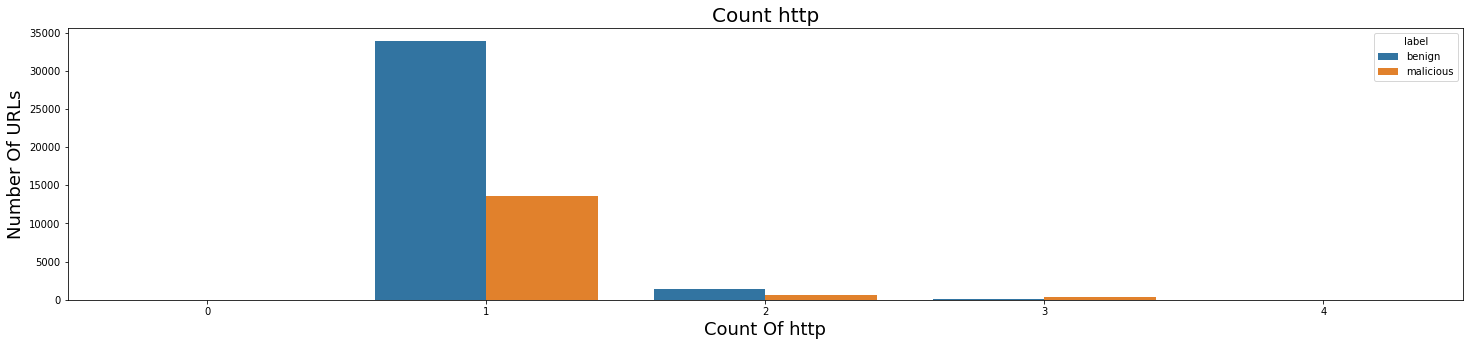

In [32]:
plt.figure(figsize=(25,5))
plt.title("Count http",fontsize=20)
sns.countplot(x='count-http',data=urldata,hue='label')
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
x = urldata[['url_length', 'hostname_length', 'tld_length', 'count@', 'count.', 'count-http']]

#Target Variable
y = urldata['result']

In [27]:
x.shape

(50000, 6)

In [28]:
y.shape

(50000,)

In [29]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [30]:
#Logistic Regression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

0.87255

In [31]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.973075